In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import cv2
import os 
import glob
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
uninfected_images = []
uninfected_labels = []
infected_images = []
infected_labels = []
def PrepData():

    for file in glob.glob("cell_images/Uninfected/*.png"):
        file = cv2.imread(file)
        file = cv2.resize(file, (81,81))
        uninfected_images.append(file)
        uninfected_labels.append(0)
    print(len(uninfected_images))
    

    for file in glob.glob("cell_images/Parasitized/*.png"):
        file = cv2.imread(file)
        file = cv2.resize(file, (81,81))
        infected_images.append(file)
        infected_labels.append(1)
    print(len(infected_images))
    
    images = uninfected_images + infected_images
    labels = uninfected_labels + infected_labels
    
    image_train, image_test, label_train, label_test = train_test_split(images, labels, test_size = 0.33)
    
    image_train = np.array(image_train)
    image_test = np.array(image_test)
    label_train = np.array(label_train)
    label_test = np.array(label_test)
    
    return image_train, image_test, label_train, label_test

In [3]:
image_train, image_test, label_train, label_test = PrepData()

13779
13779


(<matplotlib.axes._subplots.AxesSubplot at 0x1cfc6165460>,
 <matplotlib.image.AxesImage at 0x1cfc642a610>)

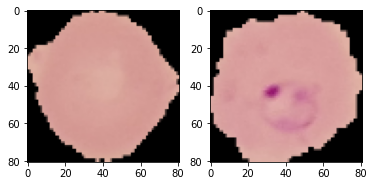

In [4]:
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(uninfected_images[0], cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(infected_images[0], cv2.COLOR_BGR2RGB))

In [5]:
from keras.layers import Convolution2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from keras.layers import MaxPooling2D

from keras.models import Sequential
from keras import optimizers

In [6]:
classifier = Sequential()
classifier.add(Convolution2D(50, (3, 3), input_shape = (81, 81, 3), activation = 'relu',padding='same'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'relu', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'sigmoid', units=1))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 81, 81, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 50)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 40, 40, 50)       200       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 40, 40, 50)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 32)        14432     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 32)       0

In [8]:
from keras import layers

# Initialising the CNN
model = Sequential()
# Create convolutional layer. There are 3 dimensions for input shape
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(81 ,81, 3)))
# Pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (64 ,64,  3)))
# Pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Adding a second convolutional layer with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (64 ,64,  3)))
# Second pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Adding a third convolutional layer with 128 filters
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (64 ,64,  3)))
# Third pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Flattening
model.add(layers.Flatten())
# Full connection
model.add(layers.Dense(units = 512, activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 79, 79, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)        

In [11]:
history = classifier.fit(np.array(image_train), 
                         label_train, 
                         batch_size = 64, 
                         epochs = 5,
                         validation_split = 0.1)

Epoch 1/5
260/260 [==============================] - 357s 1s/step - loss: 0.1811 - accuracy: 0.9344 - val_loss: 0.3931 - val_accuracy: 0.8874
Epoch 2/5
260/260 [==============================] - 353s 1s/step - loss: 0.1619 - accuracy: 0.9413 - val_loss: 0.1689 - val_accuracy: 0.9507
Epoch 3/5
260/260 [==============================] - 358s 1s/step - loss: 0.1488 - accuracy: 0.9459 - val_loss: 0.1564 - val_accuracy: 0.9459
Epoch 4/5
260/260 [==============================] - 351s 1s/step - loss: 0.1339 - accuracy: 0.9509 - val_loss: 0.1658 - val_accuracy: 0.9350
Epoch 5/5
260/260 [==============================] - 349s 1s/step - loss: 0.1172 - accuracy: 0.9568 - val_loss: 0.2077 - val_accuracy: 0.9296


In [12]:
print(type(history))
classifier.save("D:/udemy/malaria_model.h5")

<class 'keras.callbacks.History'>


In [13]:
classifier = keras.models.load_model("D:/udemy/malaria_model.h5")

In [14]:
results = classifier.evaluate(image_test,label_test,batch_size = 128)

72/72 [==============================] - 68s 936ms/step - loss: 0.2312 - accuracy: 0.9236


1/1 [==============================] - 0s 27ms/step
[[0.9949686]]


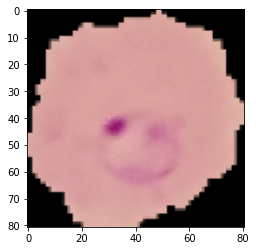

1/1 [==============================] - 0s 34ms/step
[[0.00277056]]


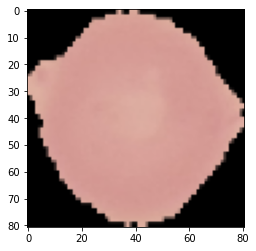

In [16]:
print(classifier.predict(np.expand_dims(infected_images[0], axis=0)))
plt.imshow(cv2.cvtColor(infected_images[0], cv2.COLOR_BGR2RGB))
plt.show()

print(classifier.predict(np.expand_dims(uninfected_images[0], axis=0)))
plt.imshow(cv2.cvtColor(uninfected_images[0], cv2.COLOR_BGR2RGB))

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [18]:
y_pred = classifier.predict(image_test)
print(y_pred)

285/285 [==============================] - 71s 250ms/step
[[0.00126185]
 [0.927253  ]
 [0.8128759 ]
 ...
 [0.00481078]
 [0.9997473 ]
 [0.01183691]]


In [19]:
categorized_y_pred = []
for pred in y_pred:
    if pred>0.5:
        pred = 1
    else:
        pred = 0
    categorized_y_pred.append(pred)
print(categorized_y_pred[:5])

[0, 1, 1, 1, 1]


In [20]:
conf_matrix = confusion_matrix(label_test, categorized_y_pred)
print(conf_matrix)

[[4473   85]
 [ 610 3927]]


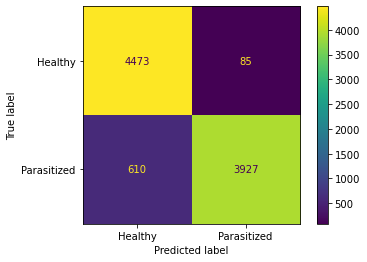

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                               display_labels=["Healthy", "Parasitized"])
disp.plot()

In [35]:
data = {'y_Actual':    label_test.tolist(),
        'y_Predicted': categorized_y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
cm = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,4473,85
1,610,3927


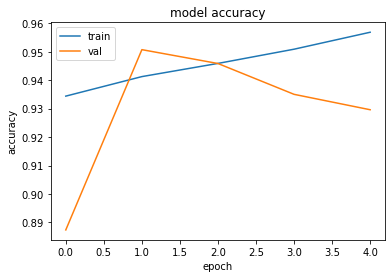

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

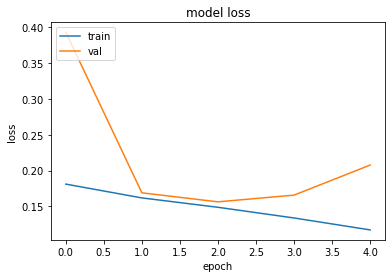

In [37]:
#plotting some loss information. Loss is the penalty for a bad prediction. The lower the number, the better the prediction. 
#The model tries to find the lowest loss possible 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()